In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [56]:
train=pd.read_csv(r'C:\Users\Dell\Desktop\Machine Learning\Kaggle-Titanic\train.csv')
test=pd.read_csv(r'C:\Users\Dell\Desktop\Machine Learning\Kaggle-Titanic\test.csv')

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [60]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Preprocessing

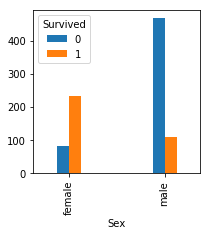

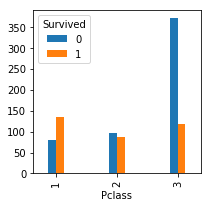

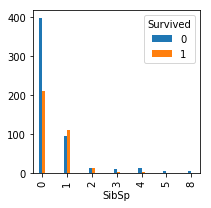

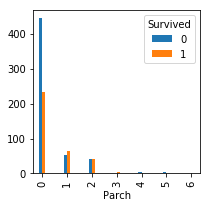

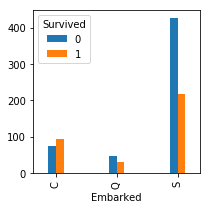

In [62]:
L=['Sex','Pclass','SibSp','Parch','Embarked']
for col in L:
    df=train.groupby([col,'Survived']).Survived.count()
    df.unstack().plot(kind='bar',width=0.25,figsize=(3,3))

In [63]:
# dropping Cabin because it contains a lot of null values
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)
# dropping PassengerId because it contains no useful information
train.drop('PassengerId',axis=1,inplace=True)
# dropping Ticket
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [64]:
name_train=train["Name"]
name_test=test['Name']
# dropping Name column
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)

In [65]:
# Replacing string values with 
train.replace(['male','female','S','C','Q'],[0,1,0,1,2],inplace=True)
test.replace(['male','female','S','C','Q'],[0,1,0,1,2],inplace=True)

In [66]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


This shows that:

1.  \>50% of people had Pclass as 3.
2.  \>50% of people died.
3.  Mean age is ~28
4.  Most people had no Sibsp
5.  Most people had no Parch
6.  Large difference in values present in Fare and Age. We can scale these values.

In [67]:
# Splitting salutation from the name.
name_train=[x.split(',')[1].split('.')[0].split(' ')[1] for x in name_train]
name_test=[x.split(',')[1].split('.')[0].split(' ')[1] for x in name_test]
# Saving salutation in a new column.
train['Salutation']=name_train
test['Salutation']=name_test

In [68]:
print(train['Salutation'].unique())
print(test['Salutation'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [69]:
# Replacing some misspelled salutations.
# Sir,Don,Jonkheer,Lady,the have only one value therefore assuming their values would do no harm to the overall data.
train['Salutation'].replace(['Mme', 'Ms','Mlle','the','Sir','Jonkheer','Don','Lady'],['Miss','Miss','Miss','Mr','Mr','Mr','Mr','Mrs'],inplace=True)

In [70]:
train['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr', 'Major', 'Col', 'Capt'],
      dtype=object)

In [71]:
# Since only two values are null in Embarked column so we can drop these values.
train.Embarked.replace(np.NaN,0,inplace=True)
# Replacing null value in Fare column with mode value.
test.Fare.replace(np.NaN,7.75,inplace=True)

In [72]:
# Dictionary saving Age mean values according to Salutation.
sal_dict=train.groupby('Salutation')['Age'].mean().to_dict()
test_sal_dict=test.groupby('Salutation')['Age'].mean().to_dict()

In [73]:
# Function to replace NaN values in Age column with mean Age values according to Salutation.
def value(row):
    # If Age index is NaN
    if np.isnan(row['Age'])==True:
        # Replacing with mean value from trained dictionary.
        row['Age']=sal_dict[row['Salutation']]
    return row

In [74]:
def value_test(row):
    # If Age index is NaN
    if np.isnan(row['Age'])==True:
        # Replacing with mean value from trained dictionary.
        row['Age']=test_sal_dict[row['Salutation']]
    return row

In [75]:
# Applying the function to all the rows in DataFrame.
train=train.apply(value,axis=1)
test=test.apply(value_test,axis=1)

In [76]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Salutation    0
dtype: int64

In [77]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            1
SibSp          0
Parch          0
Fare           0
Embarked       0
Salutation     0
dtype: int64

In [78]:
# Since one Age value is still null, I am going to replace it with the mean Age value.
age_mean=test['Age'].mean()
test.Age.replace(np.NaN,age_mean,inplace=True)

In [79]:
# Normalizing Fare column between (0,1) because there is large difference between max and min values.
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
train['Fare']=scaler.fit_transform(train['Fare'].values.reshape(-1,1))
train['SibSp']=scaler.fit_transform(train['SibSp'].values.reshape(-1,1))
train['Parch']=scaler.fit_transform(train['Parch'].values.reshape(-1,1))
train['Age']=scaler.fit_transform(train['Age'].values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [80]:
# Normalizing Fare column between (0,1) because there is large difference between max and min values.
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
test['Fare']=scaler.fit_transform(test['Fare'].values.reshape(-1,1))
test['SibSp']=scaler.fit_transform(test['SibSp'].values.reshape(-1,1))
test['Parch']=scaler.fit_transform(test['Parch'].values.reshape(-1,1))
test['Age']=scaler.fit_transform(test['Age'].values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predicting

In [81]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
0,892,3,0,0.452723,0.000,0.000000,0.015282,2,Mr
1,893,3,1,0.617566,0.125,0.000000,0.013663,0,Mrs
2,894,2,0,0.815377,0.000,0.000000,0.018909,2,Mr
3,895,3,0,0.353818,0.000,0.000000,0.016908,0,Mr
4,896,3,1,0.287881,0.125,0.111111,0.023984,0,Mrs


In [82]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
0,0,3,0,0.271174,0.125,0.0,0.014151,0.0,Mr
1,1,1,1,0.472229,0.125,0.0,0.139136,1.0,Mrs
2,1,3,1,0.321438,0.000,0.0,0.015469,0.0,Miss
3,1,1,1,0.434531,0.125,0.0,0.103644,0.0,Mrs
4,0,3,0,0.434531,0.000,0.0,0.015713,0.0,Mr


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Splitting into training and testing data.
X=train.iloc[:,1:-1] # Multiple features are used which makes predictions more accurate
y=train.iloc[:,0] # Target variable

test_feature=test.iloc[:,1:-1] # Testing features

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Logistic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
print('Logistic regression:',lr.score(X_test,y_test))
# Running on cross-validated sets.
score=cross_val_score(lr,X,y,cv=10)
print('Score:',score.mean())

Logistic regression: 0.8100558659217877
Score: 0.7935154919986381


In [85]:
# Tunning KNN
knn=KNeighborsClassifier()
print('\nTunning KNN:\n')
param={'n_neighbors':[2,3,4,5,6,7,8],
          'p':[1,2]}
clf=GridSearchCV(knn,param_grid=param,cv=2,verbose=1)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(clf.best_params_)
best_knn=clf.best_estimator_

# KNN using tunned parameters.
print('\nUsing tunned parameters to predict.')
# Running on cross-validated sets.
score=cross_val_score(best_knn,X,y,cv=10)
print('KNN cv score:',score.mean())


Tunning KNN:

Fitting 2 folds for each of 14 candidates, totalling 28 fits
0.8100558659217877
{'n_neighbors': 6, 'p': 1}

Using tunned parameters to predict.
KNN cv score: 0.8126171830666212


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.3s finished


In [86]:
from sklearn import svm
support=svm.SVC(kernel='linear',random_state=27)
support.fit(X_train,y_train)
support.score(X_test,y_test)

0.770949720670391

In [87]:
from sklearn.ensemble import RandomForestClassifier

#randomforest
RFC=RandomForestClassifier(n_estimators=15,min_samples_split=2,criterion="gini",random_state=27)
RFC.fit(X_train,y_train)
pred=RFC.predict(X_test)
#print(pred)
accuracy=float(np.sum(pred==y_test))/y_test.shape[0]
print(accuracy)

0.8268156424581006


In [88]:
RFC.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=27, verbose=0, warm_start=False)>

In [97]:
# Hyperparameter tuning Random forest
param={'min_samples_split':[2,3,4,5],
          'criterion':['gini','entropy'],
            'max_depth':range(10,100,10),
              'n_estimators':range(10,100,10)}

clf=GridSearchCV(RFC,param_grid=param,cv=2,verbose=1)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(clf.best_params_)
best_rfc=clf.best_estimator_
best_rfc.score(X_test,y_test)

Fitting 2 folds for each of 2888 candidates, totalling 5776 fits
0.8379888268156425
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 10}


[Parallel(n_jobs=1)]: Done 5776 out of 5776 | elapsed: 31.0min finished


0.8379888268156425

In [92]:
df=pd.DataFrame()
df['PassengerId']=test['PassengerId']
df['Survived']=best_rfc.predict(test_feature)

In [94]:
df.to_csv('submission.csv',index=False)